<a href="https://colab.research.google.com/github/esdrasantos/statistical-concepts-and-practice/blob/main/cstfm_mod_9_statistical_assumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing data

In [ ]:
import numpy as np
import pandas as pd
from math import nan

dados = [[276, 323, 298, 256, 277, 309, 312, 265, 311],
         [243, 279, 301, 285, 274, 243, 228, 298, 255],
         [288, 292, 310, 267, 243, 293, 255, 273, nan],
         [254, 279, 241, 227, 278, 276, 256, 262, nan]]
dados

[[276, 323, 298, 256, 277, 309, 312, 265, 311],
 [243, 279, 301, 285, 274, 243, 228, 298, 255],
 [288, 292, 310, 267, 243, 293, 255, 273, nan],
 [254, 279, 241, 227, 278, 276, 256, 262, nan]]

In [ ]:
df = pd.DataFrame(dados)
df = df.T
df.columns = ['Segunda', 'Terça', 'Quarta', 'Quinta']
df.reset_index(drop=True, inplace=True)
df

,Segunda,Terça,Quarta,Quinta
0,276.0,243.0,288.0,254.0
1,323.0,279.0,292.0,279.0
2,298.0,301.0,310.0,241.0
3,256.0,285.0,267.0,227.0
4,277.0,274.0,243.0,278.0
5,309.0,243.0,293.0,276.0
6,312.0,228.0,255.0,256.0
7,265.0,298.0,273.0,262.0
8,311.0,255.0,NaN,NaN


In [ ]:
segunda = df['Segunda'].dropna()
terca = df['Terça'].dropna()
quarta = df['Quarta'].dropna()
quinta = df['Quinta'].dropna()

# Stacking data for Tukey Test

In [ ]:
# Stacking data into a long dataframe for Tukey test

df_tukey = pd.DataFrame({
    'Group': ['Segunda'] * len(segunda) + ['Terça'] * len(terca) + ['Quarta'] * len(quarta) + ['Quinta'] * len(quinta),
    'Value': list(segunda) + list(terca) + list(quarta) + list(quinta)
})

print(df_tukey)

      Group  Value
0   Segunda  276.0
1   Segunda  323.0
2   Segunda  298.0
3   Segunda  256.0
4   Segunda  277.0
5   Segunda  309.0
6   Segunda  312.0
7   Segunda  265.0
8   Segunda  311.0
9     Terça  243.0
10    Terça  279.0
11    Terça  301.0
12    Terça  285.0
13    Terça  274.0
14    Terça  243.0
15    Terça  228.0
16    Terça  298.0
17    Terça  255.0
18   Quarta  288.0
19   Quarta  292.0
20   Quarta  310.0
21   Quarta  267.0
22   Quarta  243.0
23   Quarta  293.0
24   Quarta  255.0
25   Quarta  273.0
26   Quinta  254.0
27   Quinta  279.0
28   Quinta  241.0
29   Quinta  227.0
30   Quinta  278.0
31   Quinta  276.0
32   Quinta  256.0
33   Quinta  262.0


# Checking Residues (Erro sobre Valor)

In [ ]:
# Checking residues

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ols -> Related to Regression Analysis
# First Groups then Categories
model = smf.ols('Value ~ Group', data=df_tukey).fit()
print(model.summary())

residue = model.resid
print(residue.head())

0   -15.888889
1    31.111111
2     6.111111
3   -35.888889
4   -14.888889
dtype: float64


# Shapiro-Wilk test for residue distribution

Is it normal? 🕵

In [ ]:
# SHAPIRO TEST

import scipy.stats as stats

stat, pvalue = stats.shapiro(residue)

print(f'statistic = {stat:.4f}')
print(f'pvalue = {pvalue:.4f}')

stat = 0.9420
pvalue = 0.0706


In [ ]:
# SHAPIRO DECISION

if pvalue < 0.05:
    print('Reject null hypothesis.')
    print('Therefore the is evidence of non-normality.')
    print('We can say the distribution of residues is asymmetric...')
else:
    print('Fail to reject null hypothesis.')
    print('Therefore there is no evidence of non-normality.')
    print('We can say the distribution of residues is normal...')
#

Fail to reject null hypothesis.
Therefore there is no evidence of non-normality.
We can say the distribution of residues is normal...


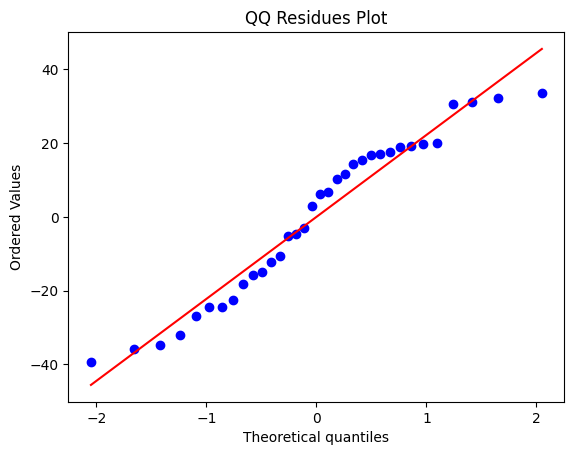

In [ ]:
import matplotlib.pyplot as plt

stats.probplot(residue, dist='norm', plot=plt)
plt.title('QQ Residues Plot')
plt.show()

# Levene's test for homoscedasticity

Homoscedasticity is avaliated by testing the variance of residues.

pt-BR >> Homocedasticidade: Os erros (diferença entre real e previsto ou, ainda, resíduos) se espalham de forma uniforme em toda a linha de regressão.

In [ ]:
stats.levene(segunda, terca, quarta, quinta)

LeveneResult(statistic=np.float64(0.500692183717862), pvalue=np.float64(0.6846548003551871))